#Patel Mahi Govindbhai - D24AIML089

##Goal: Customer Segmentation for Personalized Marketing in Food Delivery Services using Clustering and PCA


#Objective:
The primary objective of this project is to apply unsupervised machine learning techniques to segment customers of a food delivery app based on their demographic and behavioral data. By leveraging clustering algorithms such as K-Means and Hierarchical Clustering, along with Principal Component Analysis (PCA) for dimensionality reduction and visualization.

#Load dataset and import require library.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df =pd.read_csv('/content/food_delivery.csv')
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In [ ]:
#check null value
df.isnull().sum()

,0
UserID,0
Age,0
TotalOrders,0
AverageSpend,0
FavoriteCuisine,0
DeliveryRating,0
AppUsageTimePerDay,0


In [ ]:
#View the first five rows
df.head()


,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In [ ]:
#shape of the data
shape = df.shape
print(shape)

(500, 7)


#Generate the summary statistic

In [ ]:
# Describe basic statistics
stat = df.describe()
stat

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.326000,29.714000,306.584680,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,4.400000,137.275000
max,500.000000,59.000000,47.000000,539.480000,5.000000,179.900000


In [ ]:
# Average Mean Values

print("Average Age:", round(stat.loc["mean", "Age"], 2))
print("Average Spend per Order:", round(stat.loc["mean", "AverageSpend"], 2))
print("Average Total Orders:", round(stat.loc["mean", "TotalOrders"], 2))

Average Age: 39.33
Average Spend per Order: 306.58
Average Total Orders: 29.71


In [ ]:
# Highest Standard Deviation
print("\nStandard Deviation:")
std_values = stat.loc["std"]
max_std_col = std_values.idxmax()
print(std_values)
print(f"\nColumn with Highest Variation: {max_std_col} (std = {std_values[max_std_col]:.2f})")


Standard Deviation:
UserID                144.481833
Age                    12.200386
TotalOrders             5.747196
AverageSpend           74.732407
DeliveryRating          0.731794
AppUsageTimePerDay     48.472478
Name: std, dtype: float64

Column with Highest Variation: UserID (std = 144.48)


In [ ]:
#minimum or maximum value
stat.loc["min"]
stat.loc["max"]

,max
UserID,500.00
Age,59.00
TotalOrders,47.00
AverageSpend,539.48
DeliveryRating,5.00
AppUsageTimePerDay,179.90


#Check missing value in Dataset

In [ ]:
#check missing value
missing = df.isna().sum()
total_missing = missing.sum()
print(total_missing)


0


In [ ]:
#display all columns
print(df.columns)


Index(['UserID', 'Age', 'TotalOrders', 'AverageSpend', 'FavoriteCuisine',
       'DeliveryRating', 'AppUsageTimePerDay'],
      dtype='object')


In [ ]:
# Keep only the numerical, behavior-based features
columns_to = ['Age', 'TotalOrders', 'AverageSpend', 'DeliveryRating', 'AppUsageTimePerDay']
X = df[columns_to]
#cleaned dataset
X.head()


,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,4.6,20.9
1,46,34,193.97,3.0,150.2
2,32,22,291.66,4.1,59.7
3,25,30,232.21,3.7,85.5
4,38,27,244.84,4.7,13.7


#Standrized data using Standredscaler

**df.hist(figsize=(10, 7)):**
 - This creates histograms for each numeric column in the DataFrame df.

 - It helps visualize the distribution of values for each feature.

**plt.suptitle():**

 - Adds a main title on top of all the histograms.

 - suptitle means “super title” — used when you have multiple subplots.

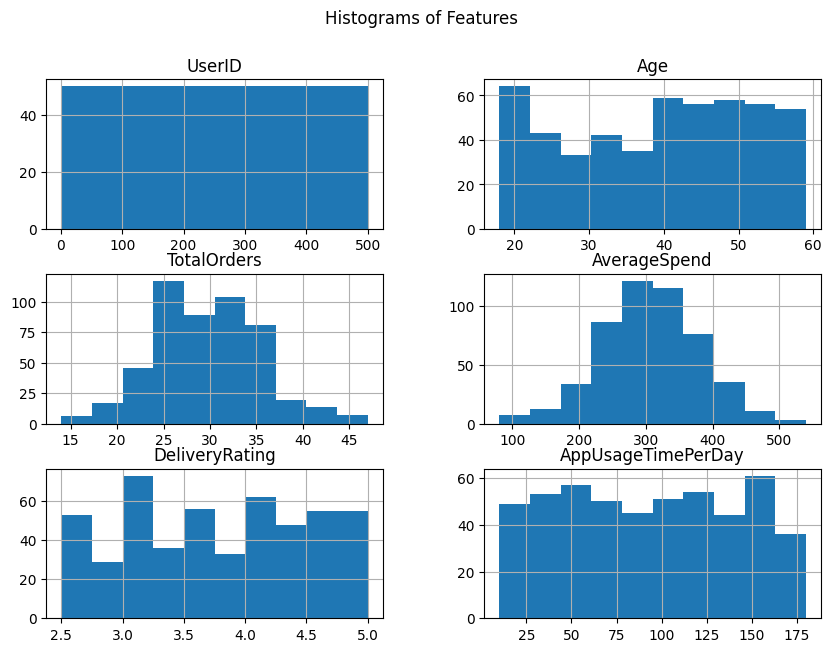

In [ ]:
#create histogram chart
df.hist(figsize=(10, 7))
plt.suptitle("Histogram of Features")
plt.show()

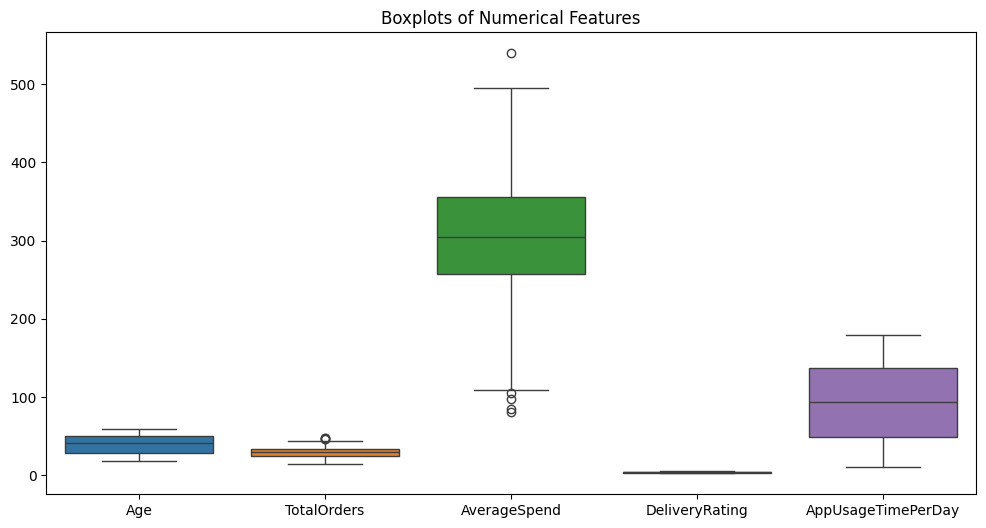

In [ ]:
#Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["UserID", "FavoriteCuisine"]))
plt.title("Boxplots of Numerical Features")
plt.show()

**correlation**

 - Correlation is a statistical measure that describes how two variables move in relation to each other.

**df.corr()**
 - This calculates the correlation matrix for all numeric columns in the     DataFrame df.

1 = perfect positive correlation.

0 = no correlation

-1 = perfect negative correlation (move in opposite directions).

**sns.heatmap()**
 - This uses Seaborn to draw a heatmap of the correlation matrix.

 - annot=True: adds numeric values inside each cell of the heatmap.

 - cmap='coolwarm': uses a color gradient from blue (negative) to red (positive) to visually show strength of correlation.



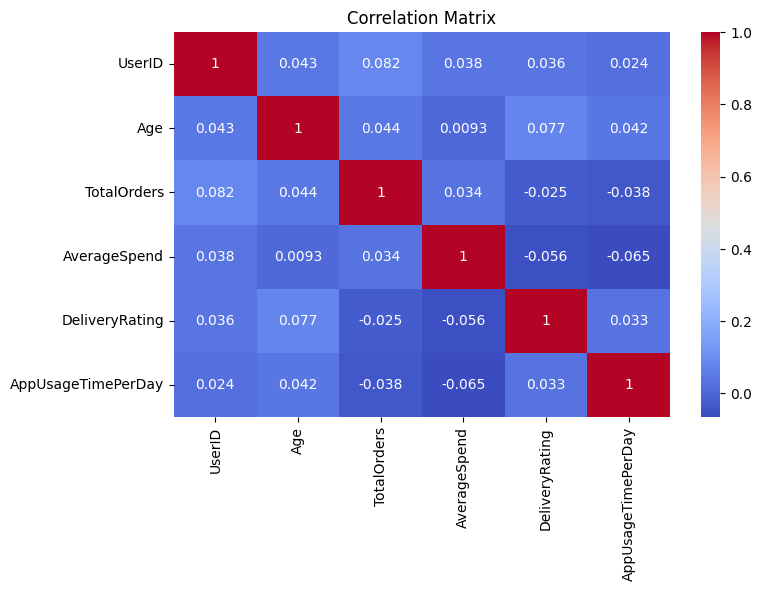

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**StandardScaler:**
 - Scales numeric data so it has a mean of 0 and standard deviation of 1.
→ Useful before clustering to make features comparable.

**LabelEncoder:**
 - Converts categorical labels (text) into numeric codes.
 -  Example: ["Low", "Medium", "High"] → [0, 1, 2].

**PCA (Principal Component Analysis):**
 - Reduces dimensions of data while keeping most of the information.
 - Helps with visualization and speeding up clustering.

**KMeans Algoritham:**
 - Groups data into k clusters by minimizing distance to cluster centers.

**AgglomerativeClustering:**
 - A hierarchical clustering method that merges the most similar points step by step.

**DBSCAN:**
 - Clusters data based on density (groups nearby points), and detects outliers.

**silhouette_score:**
 - Measures how well each point fits into its cluster.
 - Higher score = better and more defined clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score

**df_clean = df.drop(columns=["UserID", "FavoriteCuisine"])**
 - This line removes the columns "UserID" and "FavoriteCuisine" from the dataset.

**Why?**

 - "UserID" is just a label and doesn't help in clustering.

 - "FavoriteCuisine" is text, and clustering works best with numbers.

**scaler = StandardScaler()**
 - This creates a scaler object that will standardize the data (make it balanced).

**scaled_data = scaler.fit_transform(df_clean)**
 - This applies standard scaling to the cleaned data:
 - Makes all numeric columns have:
    
       Mean = 0
       Standard Deviation = 1

In [ ]:
df_clean = df.drop(columns=["UserID", "FavoriteCuisine"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

**Why use PCA here?**
 - Simplifies the data:

   The dataset might have many features like Age, Spend, Orders, etc.
   
   PCA combines them into just 2 powerful features that still represent the original behavior.

 - Makes visualization easier:

  With only 2 features, you can draw a 2D scatter plot and easily see patterns or clusters.

 - Improves clustering performance:

 PCA removes noise and keeps the most important patterns, which can help clustering algorithms work better.

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

**1 What is a scatter plot?**

 A scatter plot is a graph of dots. Each dot represents one user (or data point).
 - The position of the dot shows two values (like x and y) — in this case:

 - pca_data[:, 0] → the value from Principal Component 1 (PC1)

 - pca_data[:, 1] → the value from Principal Component 2 (PC2)

These two components come from the PCA step, which reduced the original dataset to 2 key behavior features.

 **2. Why use a scatter plot?**
 - To visualize the users in a 2D space.

 - To see patterns, such as:


Explained Variance Ratio (PCA): [0.22834353 0.21284294]


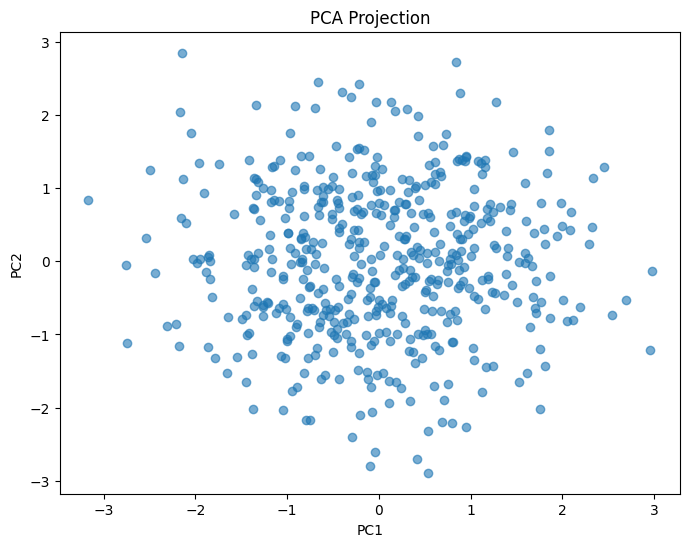

In [ ]:
print("\nExplained Variance Ratio (PCA):", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.6)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**KMEANS**
 - KMeans is a clustering algorithm used to group similar data points together. It’s a type of unsupervised machine learning, which means it tries to find patterns in data without using labeled answers.

    n_clusters=3: You are telling KMeans to find 3 user groups.

    random_state=42: For reproducible results (so same output every time).

    fit_predict(): It learns the clusters and returns labels (like 0, 1, 2) for each user.



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(scaled_data)

agglo = AgglomerativeClustering(n_clusters=3)
agg_labels = agglo.fit_predict(scaled_data)

**1. linkage(scaled_data, method='ward')**

 - Performs hierarchical clustering.

 - It starts by treating each data point (user) as its own cluster.

**2. dendrogram(linked, truncate_mode='lastp', p=20)**

 -  Plots a tree diagram showing how clusters were formed step by step.

 - truncate_mode='lastp': Only shows the last p=20 merges, to keep the diagram readable.

**3. plt.figure(figsize=(10, 6))**
 - Sets the size of the plot so it's easy to view.

 **What Is a Dendrogram?**
 - A tree-like diagram used in hierarchical clustering.

 - The vertical axis represents the distance or dissimilarity between users or clusters.

**Why Use It?**
 - Visualizes how clusters are formed.

 - Helps you decide the optimal number of clusters.

 - Useful for exploratory data analysis before using a final clustering method.

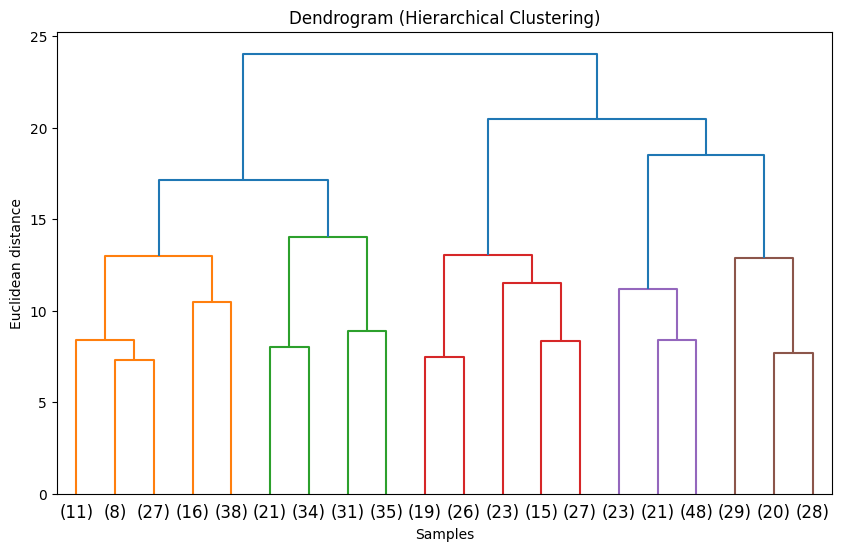

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(10, 6))
linked = linkage(scaled_data, method='ward')
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean distance")
plt.show()

 **🔹plt.subplot(1, 2, 1)**
 - This divides the plotting window into 1 row and 2 columns, and selects the 1st plot (left side).

**🔹 plt.scatter(...)**

 - This creates a scatter plot, which plots each user as a dot on a 2D plane.

**🔹 pca_data[:, 0], pca_data[:, 1]**

 - These are the x and y coordinates for each user.

 - These values come from PCA (Principal Component Analysis), which reduced the original features into 2 dimensions for visualization.

**🔹 c=k_labels**

 - This colors each point (user) based on its KMeans cluster label (e.g., Cluster 0, 1, or 2).

 - This helps you visually identify which user belongs to which group.

**🔹 cmap='viridis'**
 - This sets the color palette (Viridis is a visually appealing color map).

**🔹 alpha=0.7**
 - This sets the transparency of the dots (0 = fully transparent, 1 = fully opaque).

 **Why it is Used:**
 - To visualize the user groups formed by KMeans Clustering.

 - Helps you see the separation between clusters.

 - Gives insight into how well the PCA components and KMeans labels captured the behavior patterns of users.



Text(0, 0.5, 'PC2')

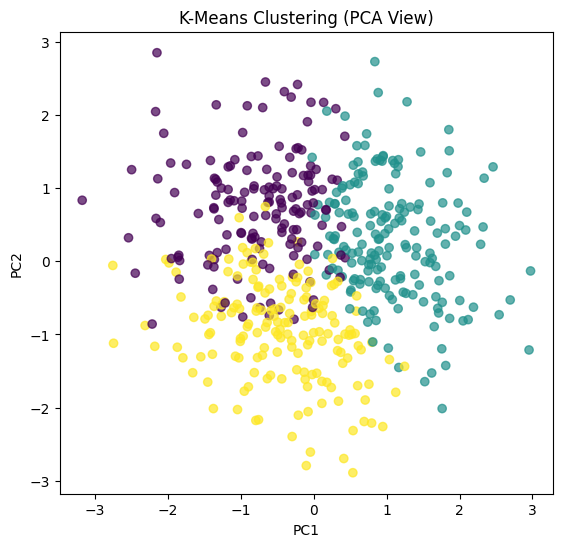

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=k_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")